<a href="https://colab.research.google.com/github/Ullas2534/Projects/blob/main/Foreign_Direct_Investment_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/FDI data.csv")

In [ ]:
# Reshape the data from wide format to long format
df1 = df.melt(id_vars=['Sector'], var_name='Year', value_name='FDI')

In [ ]:
df1.head()

Sector     Year    FDI
0  METALLURGICAL INDUSTRIES  2000-01  22.69
1                    MINING  2000-01   1.32
2                     POWER  2000-01  89.42
3   NON-CONVENTIONAL ENERGY  2000-01   0.00
4           COAL PRODUCTION  2000-01   0.00

In [ ]:
df1.columns

Index(['Sector', 'Year', 'FDI'], dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sector  1071 non-null   object 
 1   Year    1071 non-null   object 
 2   FDI     1071 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
df1.shape

(1071, 3)

In [ ]:
df1.describe()

FDI
count  1071.000000
mean    309.982250
std     819.037233
min       0.000000
25%       3.140000
50%      37.940000
75%     213.740000
max    8684.070000

Sector-Wise Investment Analysis

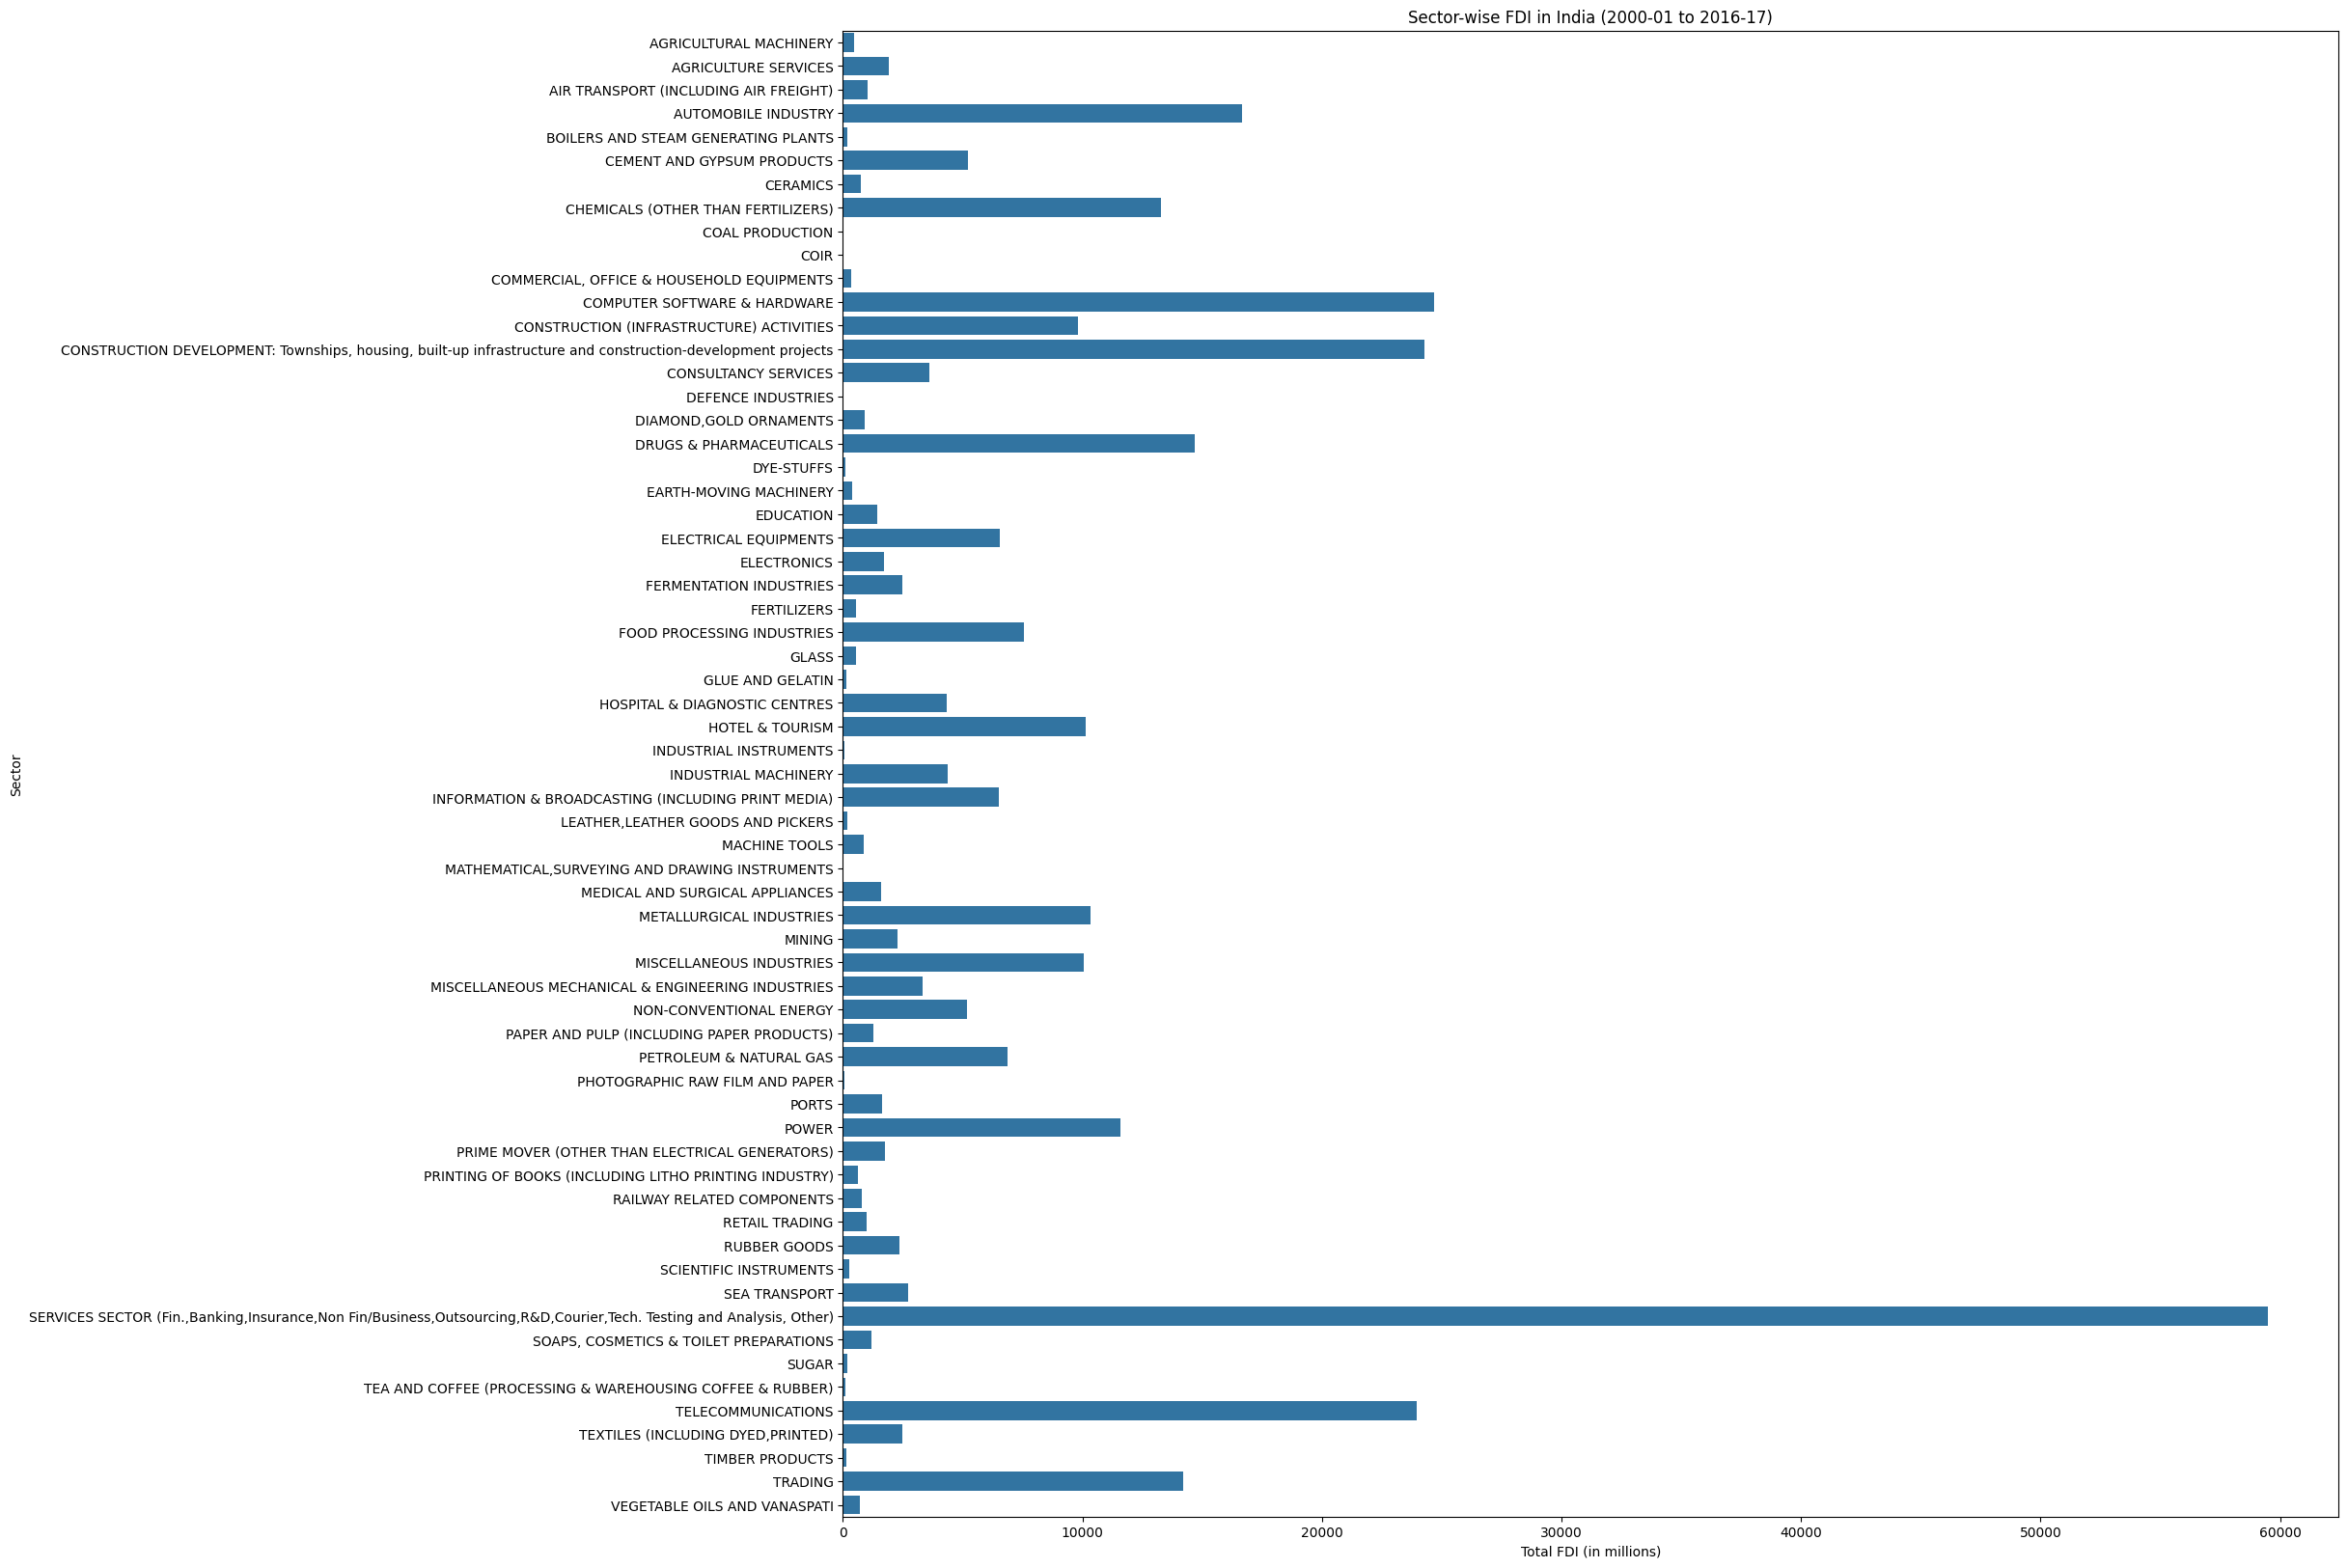

In [ ]:
sector_fdi = df1.groupby('Sector')['FDI'].sum().reset_index()

# Plot the sector-wise FDI
plt.figure(figsize=(20, 20))
sns.barplot(data=sector_fdi, x='FDI', y='Sector')
plt.title('Sector-wise FDI in India (2000-01 to 2016-17)')
plt.xlabel('Total FDI (in millions)')
plt.ylabel('Sector')
plt.show()

Year-Wise Investment Analysis

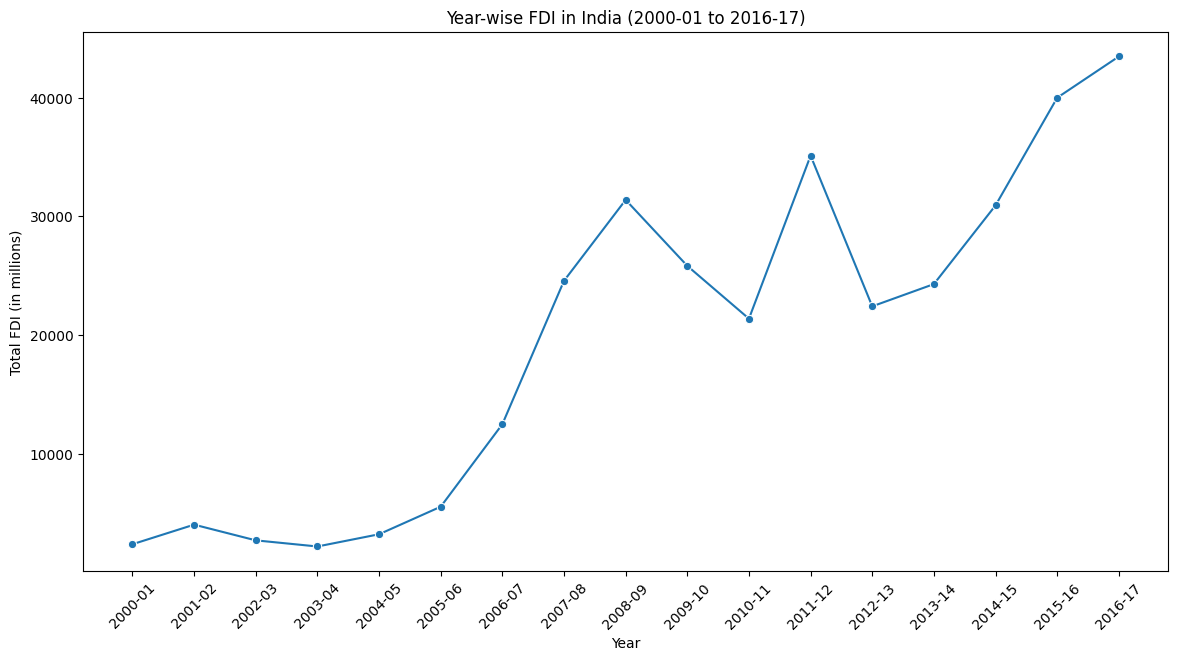

In [ ]:
year_fdi = df1.groupby('Year')['FDI'].sum().reset_index()

# Plot the year-wise FDI
plt.figure(figsize=(14, 7))
sns.lineplot(data=year_fdi, x='Year', y='FDI', marker='o')
plt.title('Year-wise FDI in India (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Total FDI (in millions)')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis

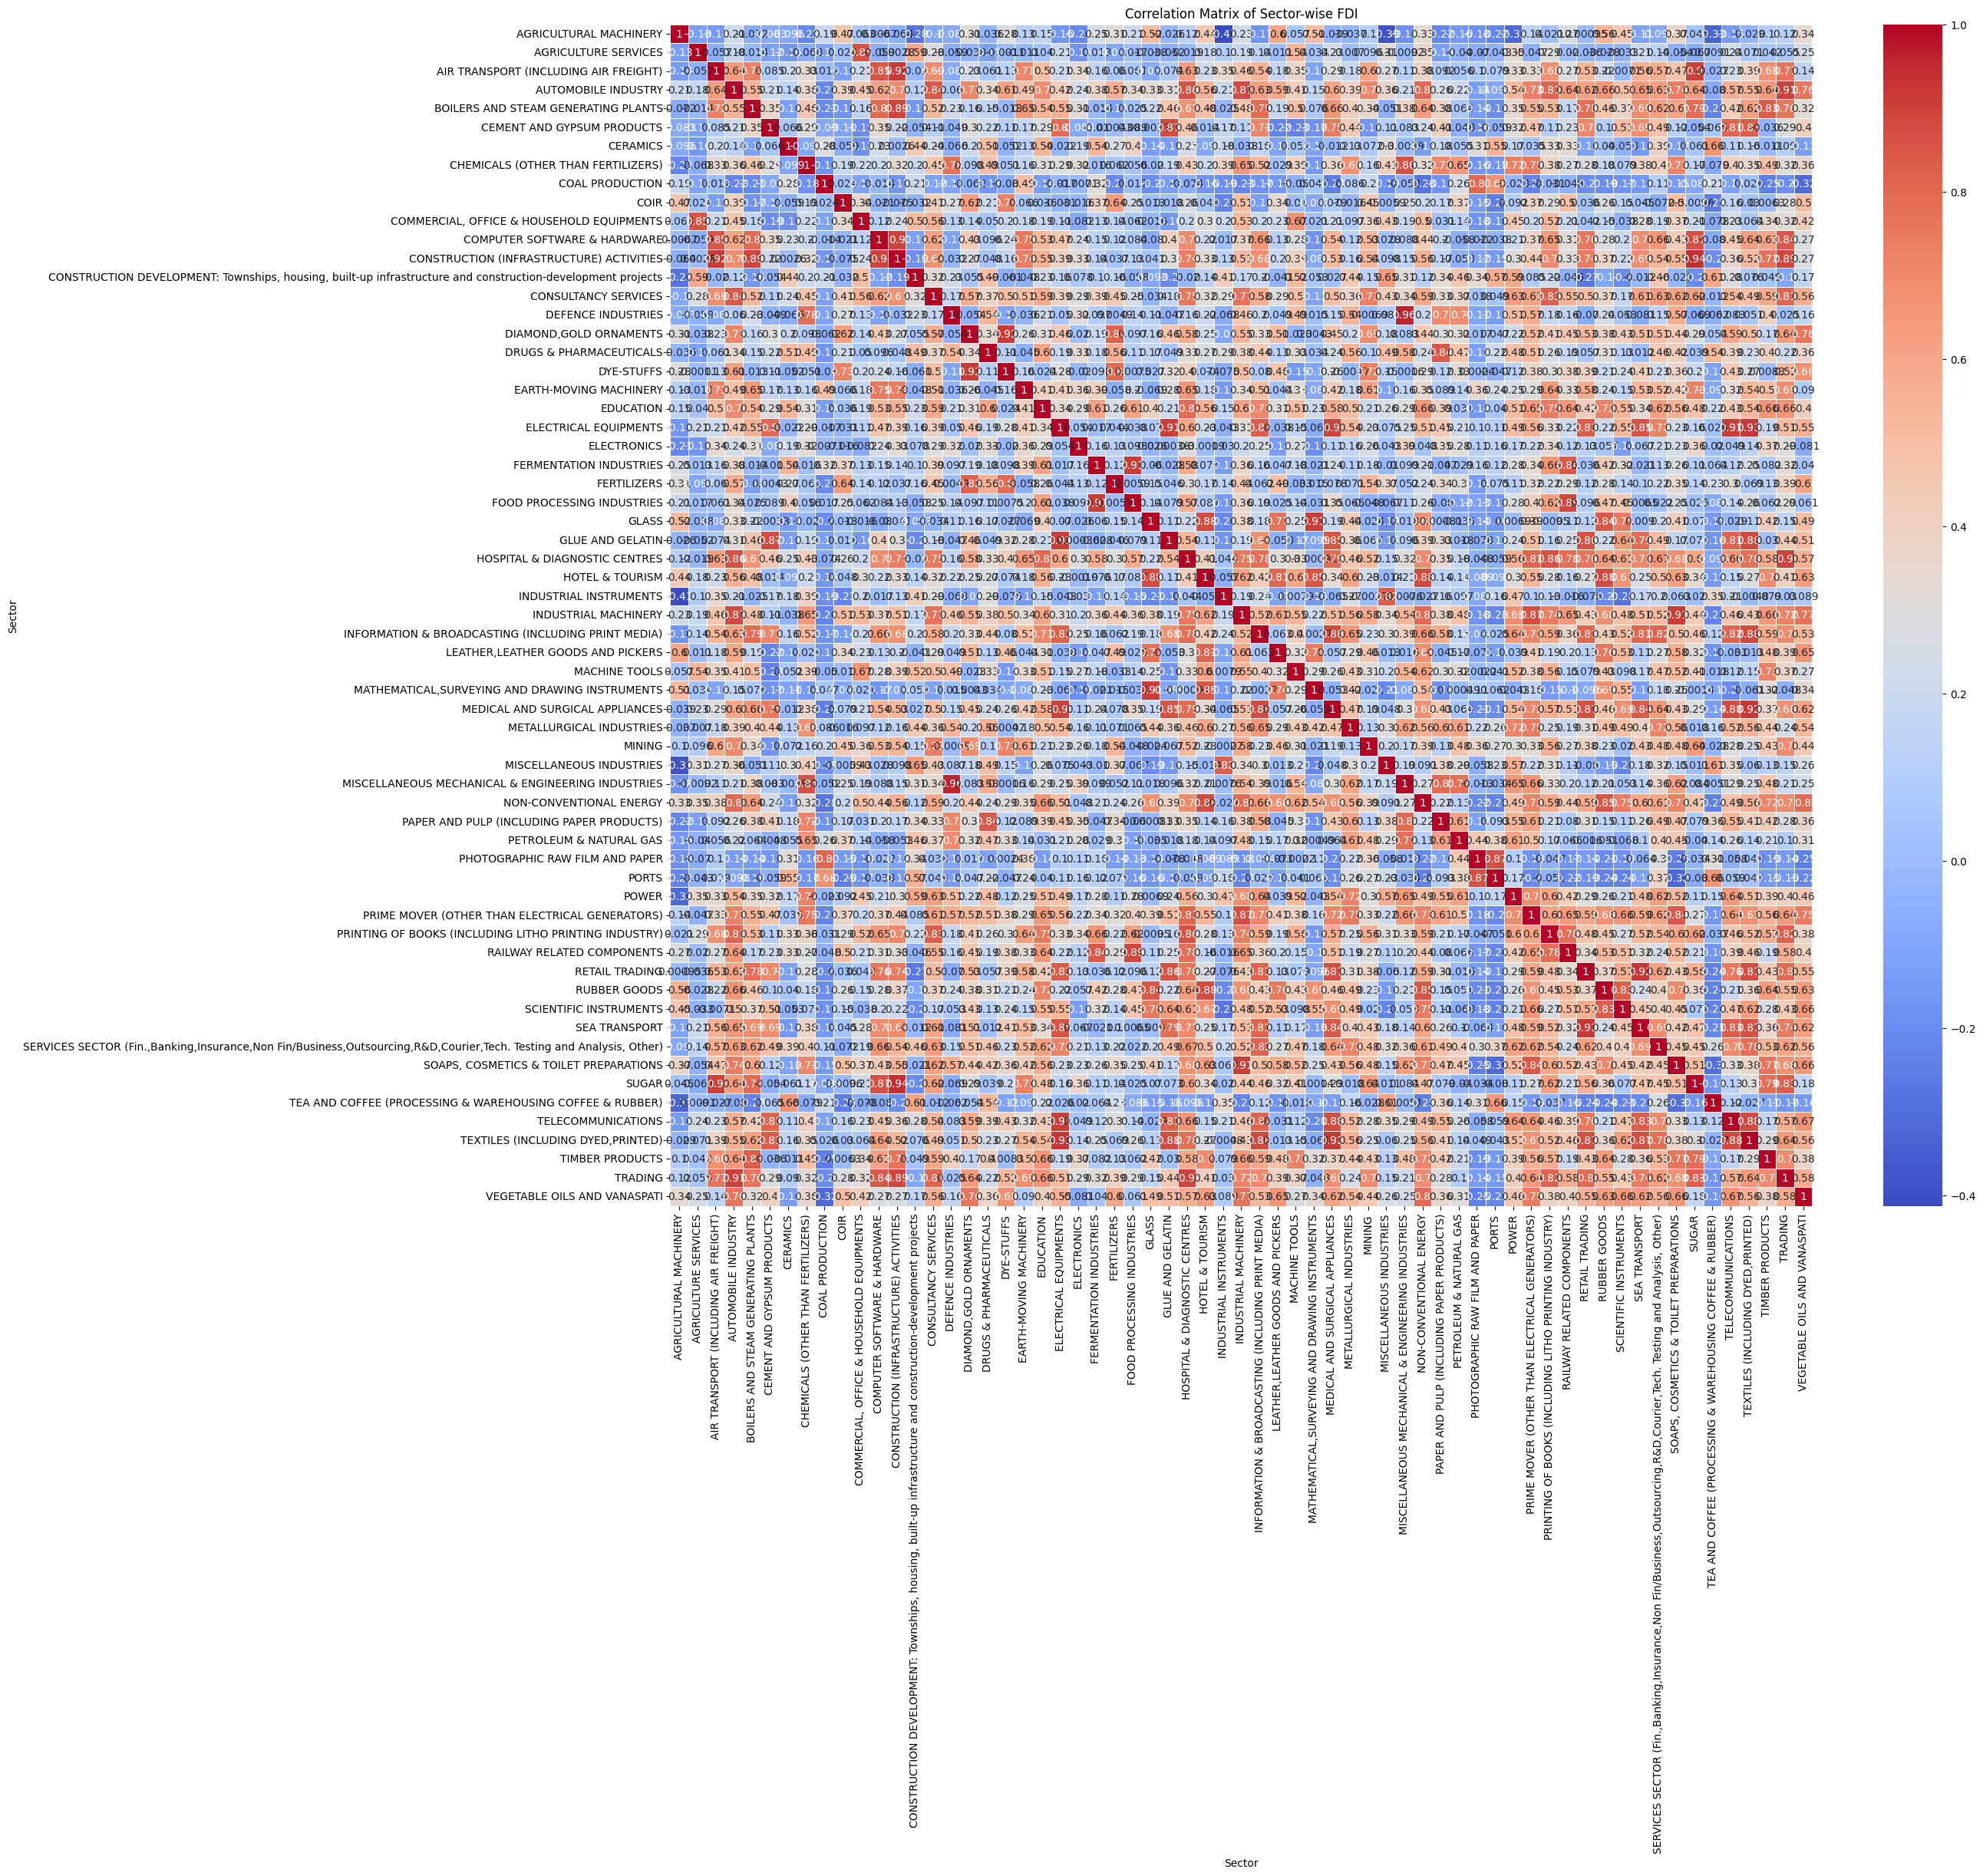

In [ ]:
# Pivot the data to create a correlation matrix
df_pivot = df1.pivot(index='Year', columns='Sector', values='FDI')

# Calculate the correlation matrix
corr_matrix = df_pivot.corr()

# Plot the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sector-wise FDI')
plt.show()

 sector-wise investment over time

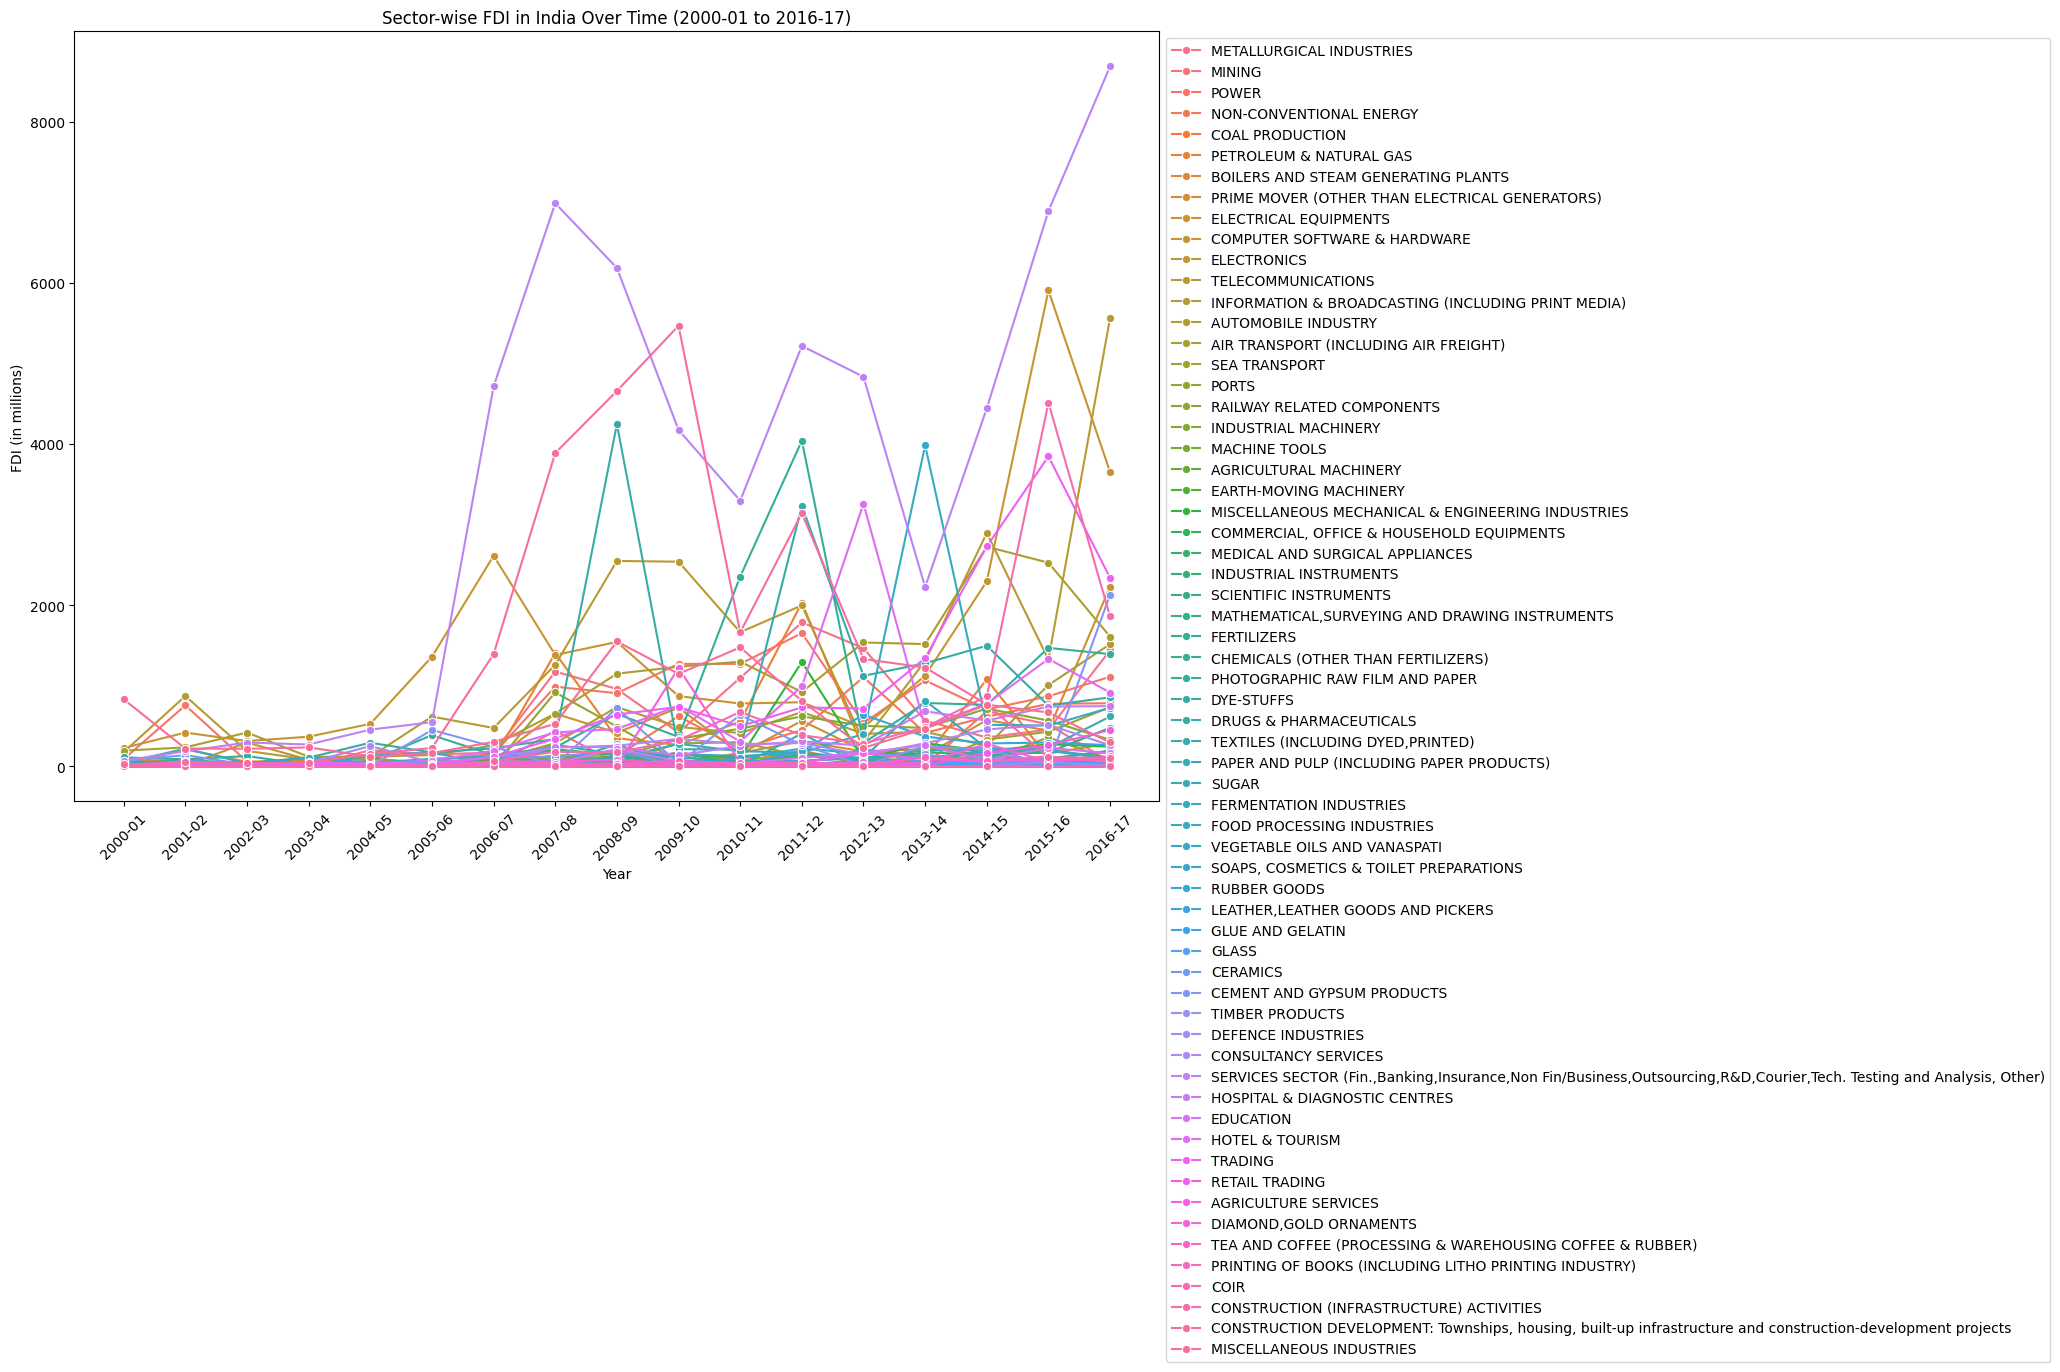

In [ ]:

plt.figure(figsize=(14, 10))
sns.lineplot(data=df1, x='Year', y='FDI', hue='Sector', marker='o')
plt.title('Sector-wise FDI in India Over Time (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('FDI (in millions)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Distribution Analysis

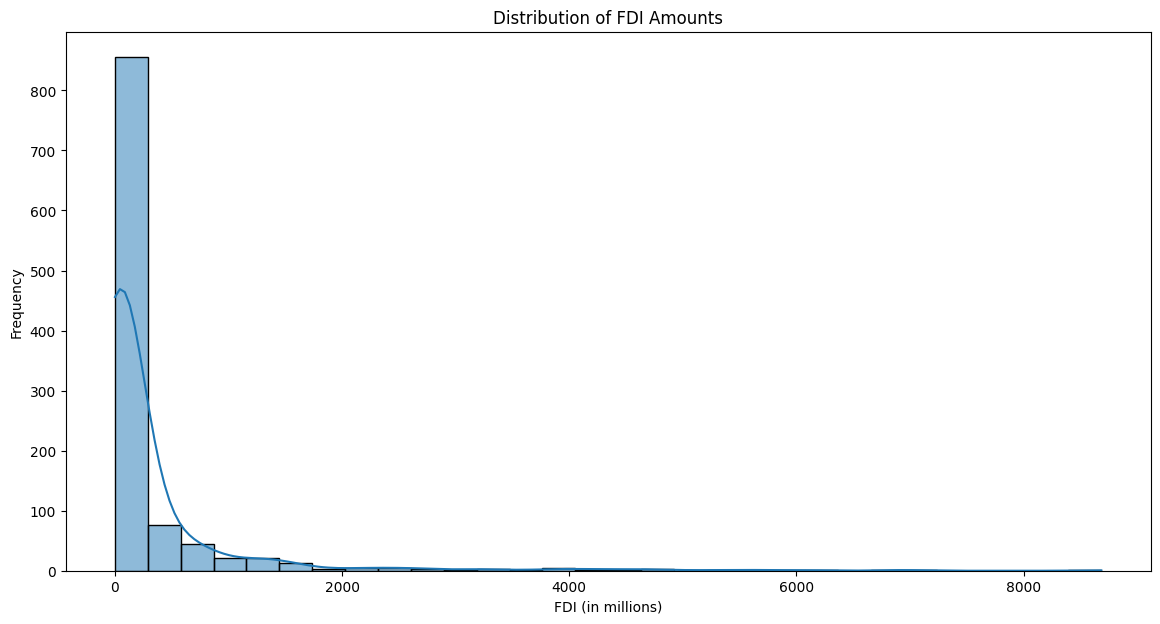

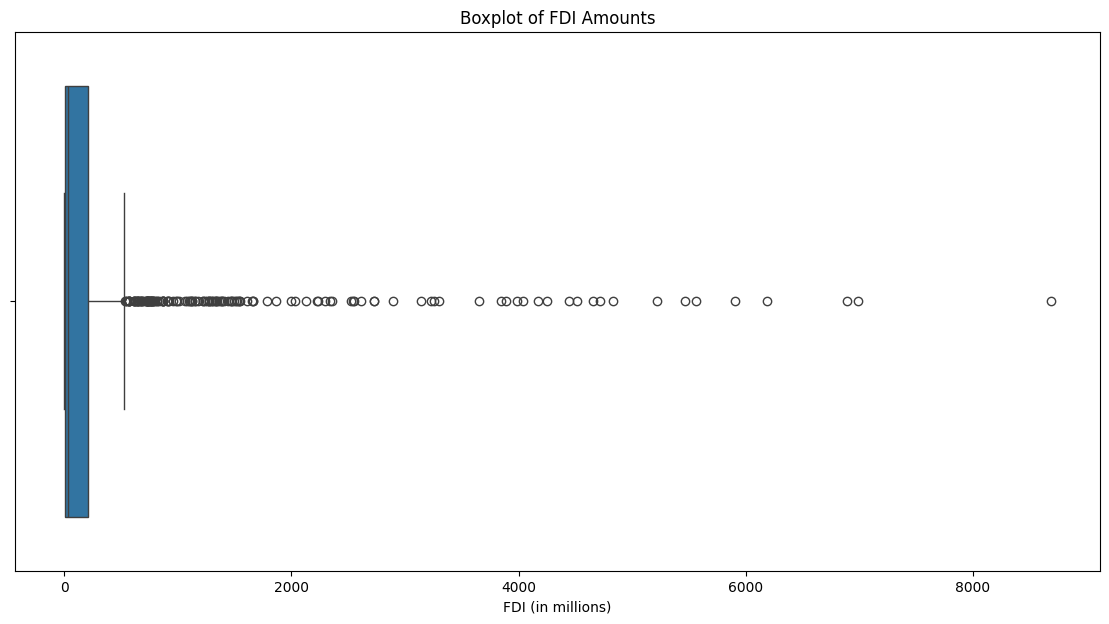

In [ ]:
# Plot distribution of FDI amounts
plt.figure(figsize=(14, 7))
sns.histplot(df1['FDI'], bins=30, kde=True)
plt.title('Distribution of FDI Amounts')
plt.xlabel('FDI (in millions)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df1, x='FDI')
plt.title('Boxplot of FDI Amounts')
plt.xlabel('FDI (in millions)')
plt.show()


Top Sectors by FDI in Different periods

In [ ]:
# Define periods
early_years = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05']
middle_years = ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10']
later_years = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']

# Function to get top sectors in given years
def top_sectors_in_period(years, top_n=5):
    period_data = df1[df1['Year'].isin(years)]
    top_sectors = period_data.groupby('Sector')['FDI'].sum().nlargest(top_n).reset_index()
    return top_sectors

# Top sectors in each period
top_sectors_early = top_sectors_in_period(early_years)
top_sectors_middle = top_sectors_in_period(middle_years)
top_sectors_late = top_sectors_in_period(later_years)

print("Top Sectors in Early Years:")
print(top_sectors_early)
print("\nTop Sectors in Middle Years:")
print(top_sectors_middle)
print("\nTop Sectors in Later Years:")
print(top_sectors_late)

# Combine top sectors from all periods
sectors_to_plot = pd.concat([top_sectors_early, top_sectors_middle, top_sectors_late])['Sector'].unique()


Top Sectors in Early Years:
                                              Sector      FDI
0                       COMPUTER SOFTWARE & HARDWARE  1858.24
1                           MISCELLANEOUS INDUSTRIES  1629.51
2                                 TELECOMMUNICATIONS  1447.34
3  SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...  1282.97
4                                AUTOMOBILE INDUSTRY  1092.11

Top Sectors in Middle Years:
                                              Sector       FDI
0  SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...  22606.58
1  CONSTRUCTION DEVELOPMENT: Townships, housing, ...  15632.63
2                       COMPUTER SOFTWARE & HARDWARE   7770.75
3                                 TELECOMMUNICATIONS   7443.08
4                            DRUGS & PHARMACEUTICALS   5196.83

Top Sectors in Later Years:
                                              Sector       FDI
0  SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...  35586.94
1                                 TEL

Growth Rate Analysis

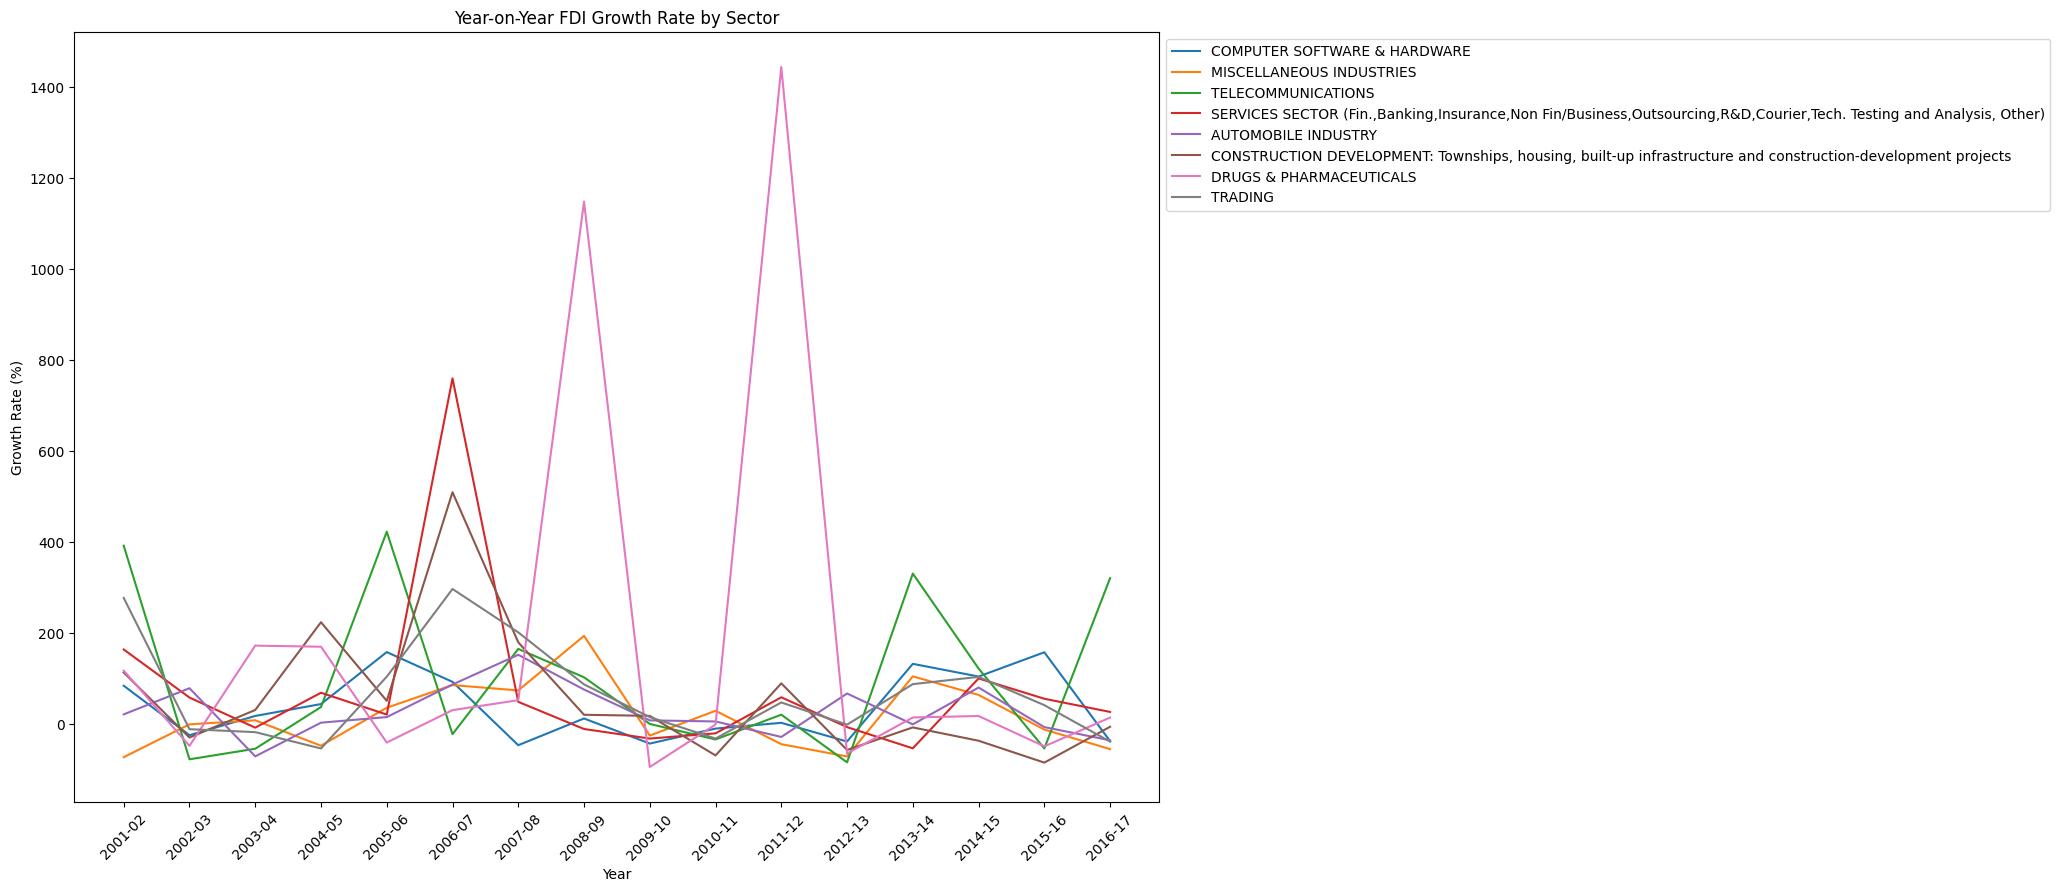

In [ ]:
# Calculate year-on-year growth rate for each sector
df1['FDI Growth Rate'] = df1.groupby('Sector')['FDI'].pct_change() * 100

# Plot the growth rate for selected sectors
plt.figure(figsize=(14, 10))
for sector in sectors_to_plot:
    sector_data = df1[df1['Sector'] == sector]
    sns.lineplot(data=sector_data, x='Year', y='FDI Growth Rate', label=sector)

plt.title('Year-on-Year FDI Growth Rate by Sector')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Section Wise Contribution Over Time

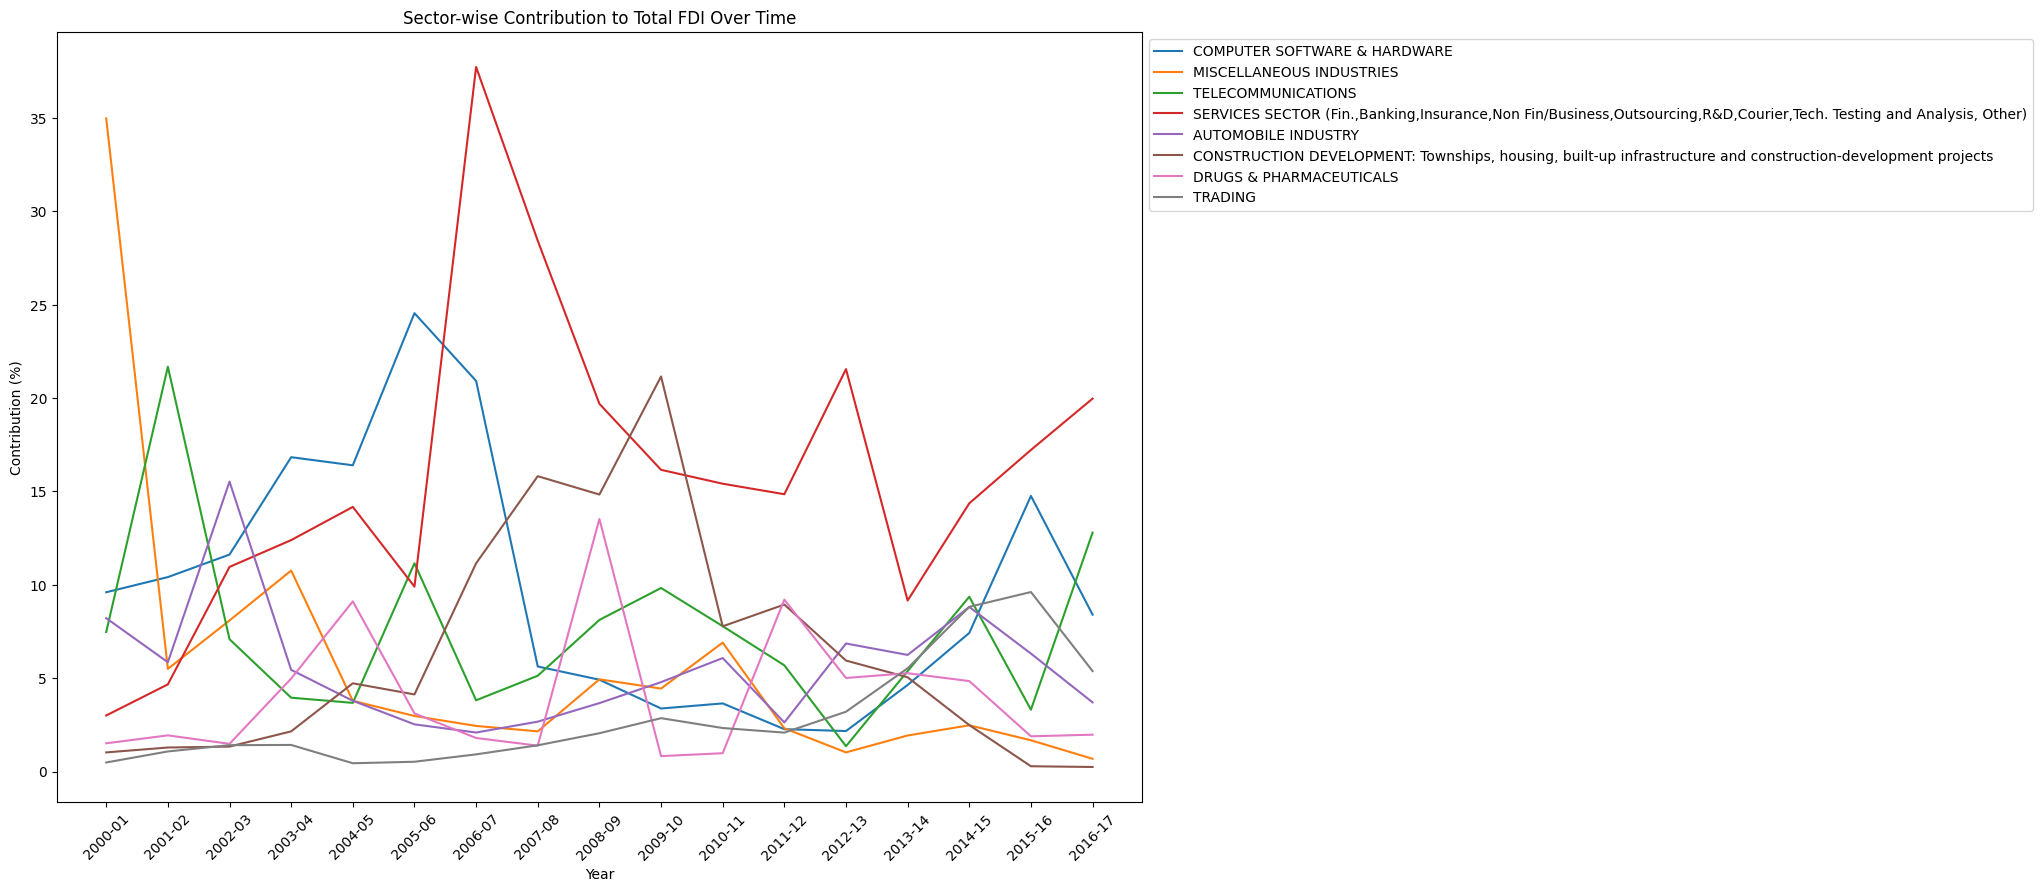

In [ ]:
# Calculate the sector-wise contribution to total FDI over time
df1['Total FDI'] = df1.groupby('Year')['FDI'].transform('sum')
df1['Sector Contribution'] = (df1['FDI'] / df1['Total FDI']) * 100

# Plot sector-wise contribution over time for top sectors
plt.figure(figsize=(14, 10))
for sector in sectors_to_plot:
    sector_data = df1[df1['Sector'] == sector]
    sns.lineplot(data=sector_data, x='Year', y='Sector Contribution', label=sector)

plt.title('Sector-wise Contribution to Total FDI Over Time')
plt.xlabel('Year')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

